In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [269]:
data = pd.read_csv('MSFT.csv')
# data = data.loc[:, 'Close'].va

In [270]:
data1 = data['Close']

In [271]:
X = data1.values.reshape(-1,1)

In [282]:
train, test = X[:int(len(X)*.8)], X[int(len(X)*.8):]
temp = test

In [273]:
scalerx = StandardScaler().fit(train)
values = scalerx.transform(train)

In [274]:
x_train = values[:-1]
y_train = values[1:]

In [275]:
x_train.shape

(6924, 1)

In [276]:
x_train = x_train.reshape((x_train.shape[0], 1, 1))
# y_train = y_train.reshape((y_train.shape[0], 1, 1))

In [277]:
x_train.shape

(6924, 1, 1)

In [278]:
model1 = Sequential()
model1.add(LSTM(32, input_shape=(None,1)))
# model.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')

In [279]:
history = model1.fit(x_train, y_train, batch_size=16, epochs=32)

Epoch 1/32
6924/6924 [==============================] - 3s 493us/step - loss: 0.2786
Epoch 2/32
6924/6924 [==============================] - 1s 154us/step - loss: 0.0027
Epoch 3/32
6924/6924 [==============================] - 1s 147us/step - loss: 0.0024
Epoch 4/32
6924/6924 [==============================] - 1s 151us/step - loss: 0.0023
Epoch 5/32
6924/6924 [==============================] - 1s 158us/step - loss: 0.0022
Epoch 6/32
6924/6924 [==============================] - 1s 159us/step - loss: 0.0021
Epoch 7/32
6924/6924 [==============================] - 1s 147us/step - loss: 0.0019
Epoch 8/32
6924/6924 [==============================] - 1s 148us/step - loss: 0.0018
Epoch 9/32
6924/6924 [==============================] - 1s 146us/step - loss: 0.0017
Epoch 10/32
6924/6924 [==============================] - 1s 154us/step - loss: 0.0016
Epoch 11/32
6924/6924 [==============================] - 1s 161us/step - loss: 0.0015
Epoch 12/32
6924/6924 [==============================] - 1s 162

In [283]:
test = temp
x_test = test
test = scalerx.fit_transform(test)
test = test.reshape((test.shape[0], 1, 1))

In [284]:
scaled_predictions = model1.predict(test)
predictions = scalerx.inverse_transform(scaled_predictions)

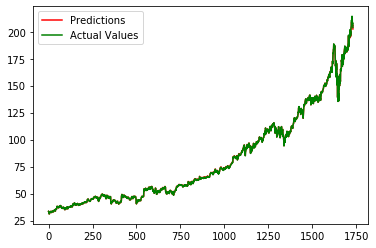

In [289]:
plt.plot(predictions, color='red', label="Predictions")
plt.plot(x_test, color='green', label = 'Actual Values')
plt.legend()